In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Datasets/'World Bank Transformed'



'X_test without PCA.csv'  'X_train without PCA.csv'   y_test.csv
'X_test with PCA.csv'	  'X_train with PCA.csv'      y_train.csv


In [4]:
import pandas as pd

In [5]:
X_train = pd.read_csv('/content/drive/MyDrive/Datasets/World Bank Transformed/X_train without PCA.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Datasets/World Bank Transformed/y_train.csv').values.ravel()
X_test = pd.read_csv('/content/drive/MyDrive/Datasets/World Bank Transformed/X_test without PCA.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Datasets/World Bank Transformed/y_test.csv').values.ravel()

In [6]:
gb_model = GradientBoostingRegressor(n_estimators=800, learning_rate=0.12, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.12, max_depth=6, n_estimators=800,
                          random_state=42)

In [7]:
y_pred = gb_model.predict(X_test)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.29284299734220653
Mean Squared Error: 0.18259669392753688
R-squared: 0.9977779779883796


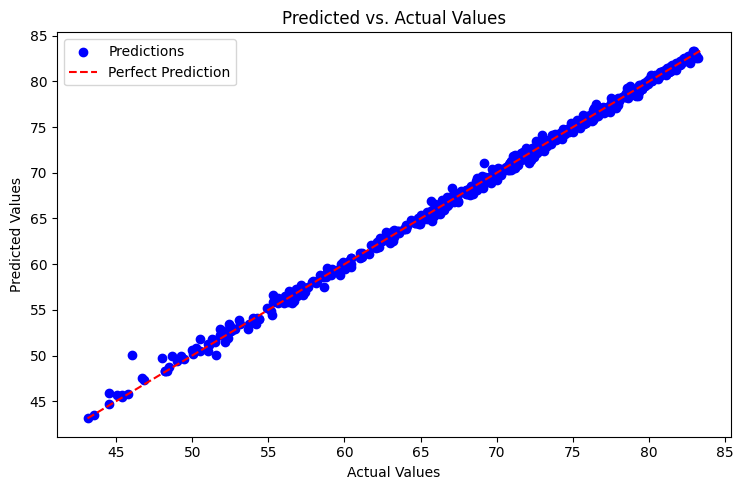

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))


ax.scatter(y_test, y_pred, color='blue', label='Predictions')


min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
ax.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')


ax.set_title('Predicted vs. Actual Values')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')



ax.set_aspect(0.6)


ax.legend()


plt.tight_layout()
plt.show()

Mortality rate, under-5 (per 1,000 live births): 0.7547168344915454
Mortality rate, adult, male (per 1,000 male adults): 0.20462219903395457
Current health expenditure per capita (current US$): 0.01871202052553942
Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%): 0.01047558996809976
Physicians (per 1,000 people): 0.0022102366473146953
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age): 0.0017661624884207374
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter): 0.0010529113868290752
Mortality caused by road traffic injury (per 100,000 population): 0.0010422038128849725
GDP (current US$): 0.001024683971051105
Hospital beds (per 1,000 people): 0.0007803327040252797
Unemployment, total (% of total labor force) (modeled ILO estimate): 0.0007109204985790101
Suicide mortality rate (per 100,000 population): 0.0006931526241596246
Access to clean fuels and technologies for cooking (% of population): 0

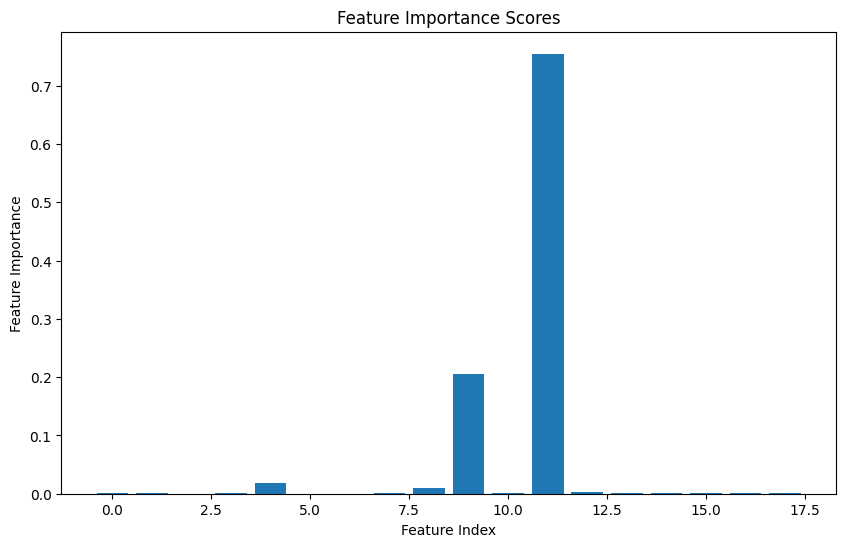

In [11]:
feature_importances = gb_model.feature_importances_
feature_names = X_train.columns

feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Scores")
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [850, 900, 950],
    'learning_rate': [ 0.1, 0.11, 0.12],
    'max_depth': [ 5, 6,7]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)
tuned_mae = mean_absolute_error(y_test,y_pred)
tuned_mse = mean_squared_error(y_test, y_pred)
tuned_r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (Tuned Model):", tuned_mae)
print("Mean Squared Error (Tuned Model):", tuned_mse)
print("R-squared (Tuned Model):", tuned_r2)

Best parameters: {'learning_rate': 0.11, 'max_depth': 6, 'n_estimators': 950}
Mean Absolute Error (Tuned Model): 0.29474075045876724
Mean Squared Error (Tuned Model): 0.1895053061505766
R-squared (Tuned Model): 0.9976939069786633
